# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from  sklearn.model_selection import cross_val_score


# Data Generation
We generate data points by using the given code. We also reshape `x` to a vector with shape (100, 1). `y`'s shape will be (100,)

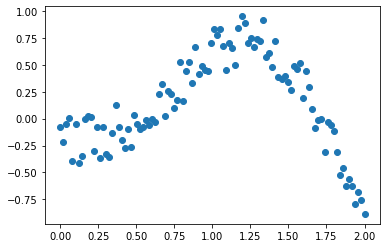

In [3]:
np.random.seed = 10
x = np.linspace(0,2,100)
er = np.random.random_sample(size=100)/2 - 0.5
y = np.sin(x**2) + er
plt.scatter(x,y)

In [4]:
x = x.reshape(-1, 1)

# Fit Models
Cross-validation is a technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of the input data. We can also say that it is a technique to check how a statistical model generalizes to an independent dataset.
We will use 5-fold cross validation. Scoring is a very important parameter in cross-validation.  When we fit classification model this parameter can `classification error`. In regression models we use metrics like `mean_squared_error`.

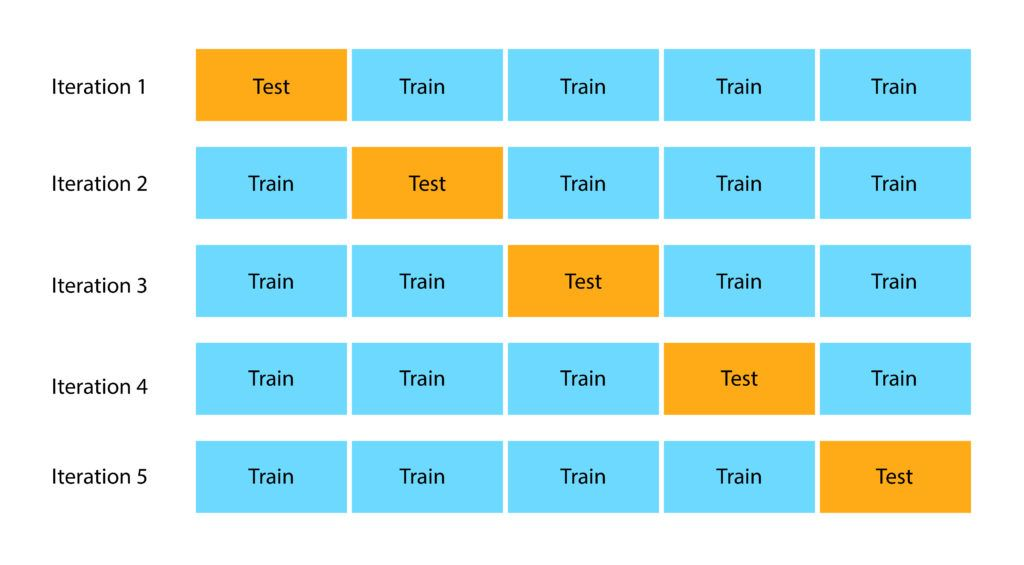
## Linear SV Regression
* The linear kernel is mostly preferred for linear problems.
* The model will be fitted with linear svr. `gamma` won't be used in linear svr models and `c` will be tuned in this case. gamma can be used in rbf kernel.




In [5]:
reglin = SVR(kernel='linear', C=100)
reglin = reglin.fit(x, y)
scores = -1*cross_val_score(reglin, x, y, cv=5,scoring='neg_mean_squared_error')
for i,score in enumerate(scores):
    print("mean_squared_error in fold No.",i+1,"==>", round(score*100,2), "%")

mean_squared_error in fold No. 1 ==> 38.16 %
mean_squared_error in fold No. 2 ==> 4.53 %
mean_squared_error in fold No. 3 ==> 30.33 %
mean_squared_error in fold No. 4 ==> 33.32 %
mean_squared_error in fold No. 5 ==> 181.76 %


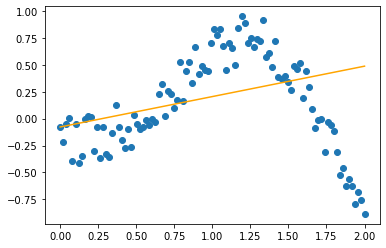

In [6]:
ypred = reglin.predict(x)
plt.scatter(x, y)
plt.plot(x, ypred, color = "orange")

## Polynomial SV Regression
* In this case we can tune C and degree to find the best model. cpef0 is a critical value. If we tune this parameter correctly, the model error will decrease significantly.
* Polynomial Kernel Formula
$$F(x, xj) = (x.xj+1)^d$$

In [7]:
regpoly = SVR(kernel="poly",degree=3,  coef0=1)
regpoly = regpoly.fit(x, y)
polyScores = -1*cross_val_score(regpoly, x, y, cv=5,scoring='neg_mean_squared_error')

for i,score in enumerate(polyScores):
    print("mean_squared_error in fold No.",i+1,"==>", np.round(score*100,2), "%")

mean_squared_error in fold No. 1 ==> 32.51 %
mean_squared_error in fold No. 2 ==> 5.09 %
mean_squared_error in fold No. 3 ==> 4.23 %
mean_squared_error in fold No. 4 ==> 2.18 %
mean_squared_error in fold No. 5 ==> 29.07 %


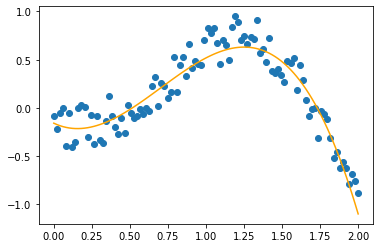

In [8]:
yPredPoly = regpoly.predict(x)
plt.scatter(x, y)
plt.plot(x, yPredPoly, color = "orange")

## RBF SV Regression
When we increase the gamma, overfitting occurs in the model. Overfitting reduces by decreasing the gamma value. 
we also use `gamma="scale"` and it works well.
* Gaussian Radial Basis Formula
$$F(x, xj) = exp(-\gamma * ||x - xj||^2)$$


### RBF SV Regression with $\gamma = 20$

In [9]:
regrbf = SVR(kernel = 'rbf', C =2, gamma = 20)
regrbf = regrbf.fit(x,y)
rbfScores = -1*cross_val_score(regrbf, x,y, cv = 5,  scoring='neg_mean_squared_error')

for i,score in enumerate(rbfScores):
    print("mean_squared_error in fold No.",i+1,"==>", np.round(score*100,2), "%")


mean_squared_error in fold No. 1 ==> 4.85 %
mean_squared_error in fold No. 2 ==> 1.92 %
mean_squared_error in fold No. 3 ==> 2.11 %
mean_squared_error in fold No. 4 ==> 3.11 %
mean_squared_error in fold No. 5 ==> 42.1 %


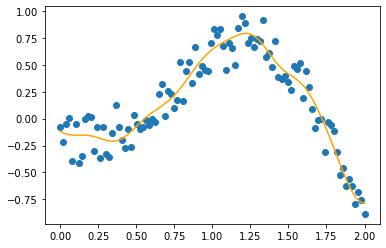

In [10]:
yPredRbf = regrbf.predict(x)
plt.scatter(x, y)
plt.plot(x, yPredRbf, color = 'orange')

### RBF SV Regression with $\gamma = scale$

In [11]:
regrbf = SVR(kernel = 'rbf', C =2, gamma="scale")
regrbf = regrbf.fit(x,y)
rbfScores = -1*cross_val_score(regrbf, x,y, cv = 5,  scoring='neg_mean_squared_error')

for i,score in enumerate(rbfScores):
    print("mean_squared_error in fold No.",i+1,"==>", np.round(score*100,2), "%")

mean_squared_error in fold No. 1 ==> 4.35 %
mean_squared_error in fold No. 2 ==> 1.22 %
mean_squared_error in fold No. 3 ==> 2.03 %
mean_squared_error in fold No. 4 ==> 2.21 %
mean_squared_error in fold No. 5 ==> 40.11 %


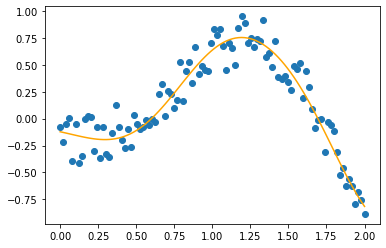

In [12]:
yPredRbf = regrbf.predict(x)
plt.scatter(x, y)
plt.plot(x, yPredRbf, color = 'orange')

### Compare Models

We've shown plots and errors of each model in the previous section. The RBF kernel has the minimum mean square error. As we mentioned, the linear model doesn't work well on this non-linear data. The Polynomial model doesn't work well with default coef0. When we change coef0 to 1, this model fits well on data samples.